In [68]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline
random_state = 42

In [51]:
# Loading in all the files
locationTree = pd.read_csv('./Location_Tree.csv', header=None)
meanBenchmark = pd.read_csv('./mean_benchmark.csv')
validRev = pd.read_csv('./Valid_rev1.csv')
rf_benchmark = pd.read_csv('./random_forest_benchmark_test_rev1.csv')
test = pd.read_csv('./test.csv')
df = pd.read_csv('./Train_rev1.csv')

## Data Cleaning & Imputation

In [179]:
df

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,10.126631,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary to We re curr...,"Glasgow, Scotland, Scotland",Glasgow,Unknown,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,10.308953,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,10.308953,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,Unknown,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,10.221941,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,10.126631,cv-library.co.uk
5,13179816,Engineering Systems Analyst Water Industry,Engineering Systems Analyst Water Industry Loc...,"Dorking, Surrey, Surrey, Surrey",Dorking,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20K to 30K,10.126631,cv-library.co.uk
6,14131336,Senior Subsea Pipeline Integrity Engineer,A globally renowned engineering and training c...,"Aberdeen, Borders",UK,Unknown,permanent,Indigo 21 Ltd,Engineering Jobs,50000 - 100000/annum,11.225243,cv-library.co.uk
7,14663196,RECRUITMENT CONSULTANT INDUSTRIAL / COMMERCIA...,THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...,"MANCHESTER, Greater Manchester",Manchester,Unknown,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 26000/annum TO 26K BASIC + COMM + BENS,9.998798,cv-library.co.uk
8,14663197,RECRUITMENT CONSULTANT CONSTRUCTION / TECHNIC...,This is an exceptional opportunity to join a c...,"LEEDS, West Yorkshire",Leeds,Unknown,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 28000/annum 18 - 28K BASIC + COMM + BENS,10.043249,cv-library.co.uk
9,15395797,Subsea Cables Engineer,A subsea engineering company is looking for an...,"Aberdeen, UK",Aberdeen,Unknown,permanent,Indigo 21 Ltd,Engineering Jobs,70000 - 100000/annum,11.350407,cv-library.co.uk


In [54]:
df['Title'] = df['Title'].astype('string')

In [55]:
df['FullDescription'] = df['FullDescription'].map(lambda x: x.replace('*K',''))
df['Title'] = df['Title'].map(lambda x: x.replace('*K',''))
df['FullDescription'] = df['FullDescription'].map(lambda x: x.replace('*k',''))
df['Title'] = df['Title'].map(lambda x: x.replace('*k',''))
df['FullDescription'] = df['FullDescription'].map(lambda x: x.replace('*',''))
df['Title'] = df['Title'].map(lambda x: x.replace('*',''))
df['FullDescription'][0]

'Engineering Systems Analyst Dorking Surrey Salary  Our client is located in Dorking, Surrey and are looking for Engineering Systems Analyst our client provides specialist software development Keywords Mathematical Modelling, Risk Analysis, System Modelling, Optimisation, MISER, PIONEEER Engineering Systems Analyst Dorking Surrey Salary '

In [56]:
# Will Impute these to be of type 'part_time' and of time "contract"
df['ContractType'][df['Category']=='Part time Jobs'] = 'part_time'
df['ContractTime'][df['Category']=='Part time Jobs'] = 'contract'

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
df.loc[[index for index, thing in enumerate (df['Title']) if "parttime" in thing or "part time" in thing], 'ContractType'] = 'part_time'
df.loc[[index for index, thing in enumerate (df['Title']) if "parttime" in thing or "part time" in thing], 'ContractTime'] = 'contract'

In [58]:
df = df.fillna("Unknown")

In [59]:
df['SalaryNormalized'] = np.log(df['SalaryNormalized'])

In [60]:
df

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,10.126631,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary to We re curr...,"Glasgow, Scotland, Scotland",Glasgow,Unknown,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,10.308953,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,10.308953,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,Unknown,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,10.221941,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,10.126631,cv-library.co.uk
5,13179816,Engineering Systems Analyst Water Industry,Engineering Systems Analyst Water Industry Loc...,"Dorking, Surrey, Surrey, Surrey",Dorking,Unknown,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20K to 30K,10.126631,cv-library.co.uk
6,14131336,Senior Subsea Pipeline Integrity Engineer,A globally renowned engineering and training c...,"Aberdeen, Borders",UK,Unknown,permanent,Indigo 21 Ltd,Engineering Jobs,50000 - 100000/annum,11.225243,cv-library.co.uk
7,14663196,RECRUITMENT CONSULTANT INDUSTRIAL / COMMERCIA...,THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...,"MANCHESTER, Greater Manchester",Manchester,Unknown,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 26000/annum TO 26K BASIC + COMM + BENS,9.998798,cv-library.co.uk
8,14663197,RECRUITMENT CONSULTANT CONSTRUCTION / TECHNIC...,This is an exceptional opportunity to join a c...,"LEEDS, West Yorkshire",Leeds,Unknown,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 28000/annum 18 - 28K BASIC + COMM + BENS,10.043249,cv-library.co.uk
9,15395797,Subsea Cables Engineer,A subsea engineering company is looking for an...,"Aberdeen, UK",Aberdeen,Unknown,permanent,Indigo 21 Ltd,Engineering Jobs,70000 - 100000/annum,11.350407,cv-library.co.uk


## EDA

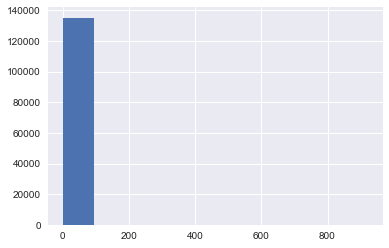

In [61]:
# Most job titles have between 1 and 100 postings
df['Title'].value_counts().hist();

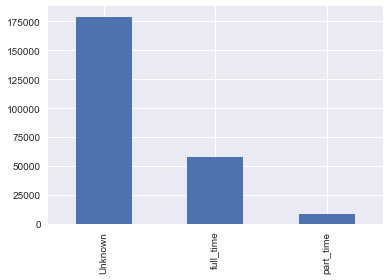

In [62]:
df['ContractType'].value_counts().plot(kind='bar');

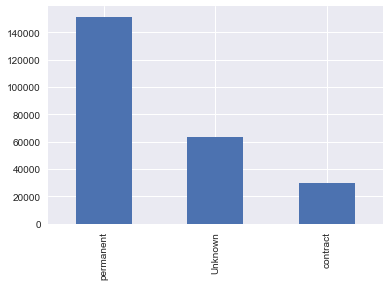

In [63]:
# Seems to be some mismatch in how "full_time" vs "part_time" is defined (above) versus how "permanent" vs "contract" jobs are defined.
# Might be best to leave out both these features in the model
df['ContractTime'].value_counts().plot(kind='bar');

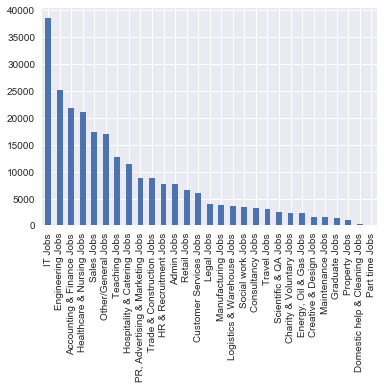

In [64]:
# Mostly IT and engineering jobs
df['Category'].value_counts().plot(kind='bar');

Top 20 Sources, representing 0.509555987711 percent of all listings in the data


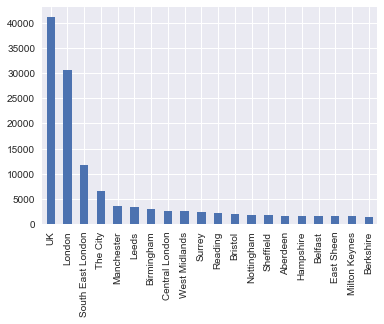

In [90]:
# Looking at the top 20 most commonly occuring Normalized Locations
# These are across The UK, mostly in England, which as where Adzuna is headquartered. Makes sense.
print ("Top 20 Sources, representing %s percent of all listings in the data" % (sum(df['LocationNormalized'].value_counts()[:20])/float(df.shape[0])))
df['LocationNormalized'].value_counts()[:20].plot(kind='bar');

In [84]:
sum(df['SourceName'].value_counts()[:20])/float(df.shape[0])

0.73784154791476009

Top 20 Sources, representing 0.737841547915 percent of all listings in the data


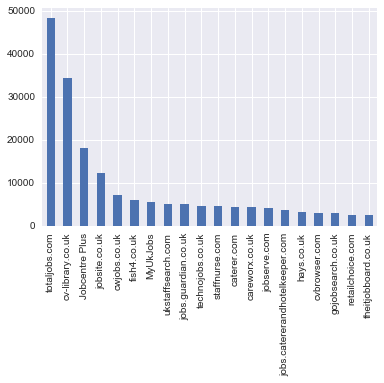

In [91]:
# Let's look at the top 20 sources of this data:
print ("Top 20 Sources, representing %s percent of all listings in the data" % (sum(df['SourceName'].value_counts()[:20])/float(df.shape[0])))
df['SourceName'].value_counts()[:20].plot(kind='bar');

Mean of SalaryNormalized (in dollars, not log dollars) is: 30236.3066516


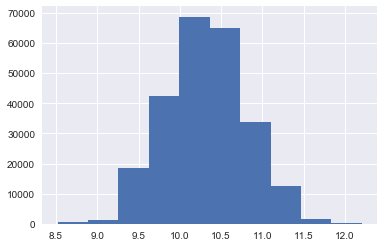

In [65]:
### We log transformed the target above, now looks as follows:
df['SalaryNormalized'].hist();
print("Mean of SalaryNormalized (in dollars, not log dollars) is: %s" % np.exp(np.mean(df["SalaryNormalized"])))

## NLP

In [93]:
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [95]:
### Subsampling the data for proof of concept - taking 30%.
sample_df = df[['FullDescription', 'Title','SalaryNormalized']].sample(frac=.3)
sample_df.reset_index(inplace=True, drop=True)
X_smp = sample_df[['FullDescription', 'Title']]
y_smp = sample_df['SalaryNormalized']

#### Pre-Processing Unstructured Text Features

In [97]:
from textacy.preprocess import preprocess_text

In [101]:
X_smp['FullDescription'] = X_smp['FullDescription'].apply(lambda x: x.decode('unicode_escape').\
                                          encode('ascii', 'ignore').\
                                          strip())
X_smp['Title'] = X_smp['Title'].apply(lambda x: x.decode('unicode_escape').\
                                          encode('ascii', 'ignore').\
                                          strip())

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
clean_text_fd = [preprocess_text(x, fix_unicode=False, lowercase=True, transliterate=False,
                              no_urls=True, no_emails=True, no_phone_numbers=True, no_currency_symbols=True,
                              no_punct=True, no_accents=True)
              for x in X_smp['FullDescription']]
clean_text_title = [preprocess_text(x, fix_unicode=False, lowercase=True, transliterate=False,
                              no_urls=True, no_emails=True, no_phone_numbers=True, no_currency_symbols=True,
                              no_punct=True, no_accents=True)
              for x in X_smp['Title']]

In [107]:
X_smp.columns

Index([u'FullDescription', u'Title'], dtype='object')

In [108]:
X_smp = pd.DataFrame({"FullDescription":clean_text_fd,"Title":clean_text_title})

In [110]:
cleaned_df = pd.concat([X_smp, y_smp], axis=1)

In [112]:
cleaned_df.to_pickle('./assets/cleaned_df.pkl')

#### EDA on Unstructured Text Features

In [114]:
# cleaned_df = pd.read_csv('./assets/cleaned_df.pkl')

In [145]:
X_smp = cleaned_df[['FullDescription', 'Title']]
y_smp = cleaned_df['SalaryNormalized']

In [ ]:
### First let's look at the FullDescription column:

In [117]:
tfv = TfidfVectorizer(ngram_range=(2,4), max_features=2500, stop_words='english')

summaries = "".join(X_smp['FullDescription'])
ngrams_summaries = tfv.build_analyzer()(summaries)

### This shows us most common 2,4 word ngram range for FullDescription. They seem like pretty common job description words...
Counter(ngrams_summaries).most_common(50)

[(u'originally posted', 19893),
 (u'job originally posted', 19893),
 (u'job originally', 19893),
 (u'experience working', 11945),
 (u'communication skills', 11852),
 (u'successful candidate', 10758),
 (u'employment agency', 10333),
 (u'customer service', 9781),
 (u'send cv', 7959),
 (u'track record', 7546),
 (u'previous experience', 6957),
 (u'acting employment', 6869),
 (u'employment business', 6407),
 (u'ideal candidate', 6392),
 (u'business development', 6326),
 (u'new business', 6255),
 (u'skills experience', 6031),
 (u'excellent communication', 5713),
 (u'ability work', 5684),
 (u'sales executive', 5223),
 (u'years experience', 4886),
 (u'work uk', 4820),
 (u'looking recruit', 4772),
 (u'fantastic opportunity', 4762),
 (u'health safety', 4706),
 (u'apply online', 4607),
 (u'skills ability', 4555),
 (u'client looking', 4527),
 (u'acting employment agency', 4450),
 (u'equal opportunities', 4426),
 (u'excellent opportunity', 4371),
 (u'opportunity join', 4359),
 (u'proven track', 435

In [122]:
### Let's see what the most commonly occuring words are for jobs that pay
### 2 standard deviations above the mean log transformed NormalizedSalary:

two_std_over = cleaned_df['FullDescription'][cleaned_df['SalaryNormalized']>=np.mean(cleaned_df['SalaryNormalized'])+(np.std(cleaned_df['SalaryNormalized']*2))]

tfv = TfidfVectorizer(ngram_range=(2,4), stop_words='english')

summaries = "".join(two_std_over)
ngrams_summaries = tfv.build_analyzer()(summaries)

Counter(ngrams_summaries).most_common(50)

[(u'job originally posted', 408),
 (u'originally posted', 408),
 (u'job originally', 408),
 (u'experience working', 334),
 (u'track record', 270),
 (u'successful candidate', 256),
 (u'allegis group', 252),
 (u'project manager', 225),
 (u'financial services', 225),
 (u'employment agency', 217),
 (u'employment business', 210),
 (u'communication skills', 204),
 (u'project management', 192),
 (u'business development', 174),
 (u'skills experience', 168),
 (u'years experience', 159),
 (u'acting employment', 153),
 (u'ideal candidate', 146),
 (u'nbsp nbsp', 145),
 (u'send cv', 143),
 (u'month contract', 141),
 (u'management experience', 140),
 (u'new business', 134),
 (u'oil gas', 131),
 (u'investment bank', 128),
 (u'proven track', 123),
 (u'client looking', 123),
 (u'proven track record', 122),
 (u'business analyst', 121),
 (u'long term', 111),
 (u'nbsp nbsp nbsp', 111),
 (u'skills ability', 106),
 (u'previous experience', 106),
 (u'excellent communication', 103),
 (u'ability work', 102),
 

In [123]:
### Let's see what the most commonly occuring words are for jobs that pay
### 2 standard deviations below the mean log transformed NormalizedSalary:

two_std_under = cleaned_df['FullDescription'][cleaned_df['SalaryNormalized']<=np.mean(cleaned_df['SalaryNormalized'])-(np.std(cleaned_df['SalaryNormalized']*2))]

tfv = TfidfVectorizer(ngram_range=(2,4), stop_words='english')

summaries = "".join(two_std_under)
ngrams_summaries = tfv.build_analyzer()(summaries)

Counter(ngrams_summaries).most_common(50)

[(u'customer service', 164),
 (u'communication skills', 130),
 (u'job originally posted', 115),
 (u'originally posted', 115),
 (u'job originally', 115),
 (u'hours week', 112),
 (u'training provided', 93),
 (u'experience working', 89),
 (u'successful candidate', 86),
 (u'closing date', 83),
 (u'market research', 69),
 (u'monday friday', 63),
 (u'excellent communication', 58),
 (u'previous experience', 57),
 (u'ideal candidate', 55),
 (u'able work', 55),
 (u'apply online', 53),
 (u'ability work', 52),
 (u'qualifications required', 52),
 (u'job description', 51),
 (u'february 2013', 50),
 (u'duties include', 50),
 (u'fantastic opportunity', 50),
 (u'excellent communication skills', 49),
 (u'high quality', 49),
 (u'young people', 49),
 (u'application form', 47),
 (u'skills ability', 47),
 (u'days week', 46),
 (u'equal opportunities', 46),
 (u'send cv', 45),
 (u'client looking', 45),
 (u'health safety', 43),
 (u'maths english', 43),
 (u'team player', 42),
 (u'employment agency', 40),
 (u'wo

## Modeling

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_smp, y_smp, test_size=0.33, random_state=random_state)

In [147]:
# Splitting out X_train and X_test a little finer - Will Vectorize each in separate models:
X_trainFD = X_train['FullDescription']
X_testFD = X_test['FullDescription']
X_trainTTL = X_train['Title']
X_testTTL = X_test['Title']

In [148]:
# First, Full Descriptions:
tfv = TfidfVectorizer(ngram_range=(2,4), max_features=2500, stop_words='english')
X_trainFD = tfv.fit_transform(X_trainFD)
X_testFD = tfv.transform(X_testFD)

In [150]:
tfv.get_feature_names()[:50]

[u'10 years',
 u'12 months',
 u'14 days',
 u'14 days selected',
 u'14 days selected interview',
 u'18 months',
 u'1st line',
 u'20 days',
 u'25 days',
 u'25 days holiday',
 u'28 days',
 u'2nd line',
 u'2nd line support',
 u'3rd line',
 u'3rd party',
 u'aa rosette',
 u'ability build',
 u'ability communicate',
 u'ability deliver',
 u'ability develop',
 u'ability influence',
 u'ability lead',
 u'ability manage',
 u'ability prioritise',
 u'ability understand',
 u'ability use',
 u'ability work',
 u'ability work initiative',
 u'ability work pressure',
 u'ability work team',
 u'able build',
 u'able communicate',
 u'able contact',
 u'able demonstrate',
 u'able manage',
 u'able offer',
 u'able provide',
 u'able respond',
 u'able travel',
 u'able use',
 u'able work',
 u'able work initiative',
 u'able work pressure',
 u'able work team',
 u'aca acca',
 u'academic background',
 u'accept applications',
 u'accept cs',
 u'accept cs privacy',
 u'accept cs privacy policy']

In [155]:
the_mlr = LinearRegression()
the_mlr.fit(X_trainFD, y_train)
# Cross validated accuracy below
cross_val_score(LinearRegression(), X_trainFD, y_train, cv=10).mean()

array([ 0.49279691,  0.49707669,  0.49396127,  0.48830837,  0.46879544,
        0.47814141,  0.49258859,  0.47699034,  0.476882  ,  0.47974182])

In [157]:
FD_pred = the_mlr.predict(X_testFD)
# R_sqaurd on the heldout data:
r2_score(y_test, FD_pred)

0.48606344310891136

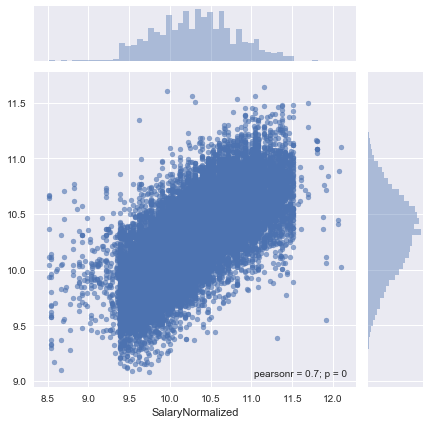

In [158]:
sns.jointplot(y_test, FD_pred , joint_kws=dict(s=25, alpha=0.6))

In [159]:
# Next, just Title:
tfv = TfidfVectorizer(ngram_range=(2,4), max_features=2500, stop_words='english')
X_trainTTL = tfv.fit_transform(X_trainTTL)
X_testTTL = tfv.transform(X_testTTL)

In [161]:
tfv.get_feature_names()[:50]

[u'12 month',
 u'12 month contract',
 u'12 months',
 u'1st 2nd',
 u'1st 2nd line',
 u'1st 2nd line support',
 u'1st line',
 u'1st line support',
 u'2nd 3rd',
 u'2nd 3rd line',
 u'2nd line',
 u'2nd line support',
 u'2nd line support engineer',
 u'2nd3rd line',
 u'3rd line',
 u'3rd line infrastructure',
 u'3rd line support',
 u'3rd line support engineer',
 u'aa rosette',
 u'aa rosettes',
 u'aa rosettes live',
 u'account coordinator',
 u'account director',
 u'account executive',
 u'account handler',
 u'account manager',
 u'account manager digital',
 u'account manager london',
 u'account manager sales',
 u'account manager sales executive',
 u'account managers',
 u'accounting manager',
 u'accounts administrator',
 u'accounts assistant',
 u'accounts audit',
 u'accounts clerk',
 u'accounts manager',
 u'accounts payable',
 u'accounts payable assistant',
 u'accounts payable clerk',
 u'accounts receivable',
 u'accounts senior',
 u'acoustic consultant',
 u'active directory',
 u'adjuster afcila',


In [162]:
the_mlr = LinearRegression()
the_mlr.fit(X_trainTTL, y_train)
# Cross validated accuracy below
cross_val_score(LinearRegression(), X_trainTTL, y_train, cv=10).mean()

0.36903224571391907

In [163]:
TTL_pred = the_mlr.predict(X_testTTL)
# R_sqaurd on the heldout data:
r2_score(y_test, TTL_pred)

0.35511088373623179

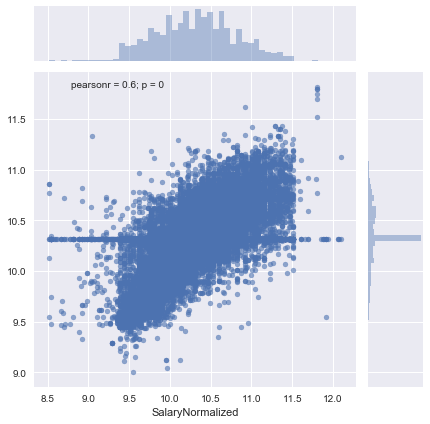

In [164]:
sns.jointplot(y_test, TTL_pred , joint_kws=dict(s=25, alpha=0.6))

In [165]:
# Let's see how ensembling these scores will do
ensembled_predictions = np.mean([TTL_pred,FD_pred], axis=0)

In [166]:
r2_score(y_test, ensembled_predictions)

0.51519793395582725